[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_06-TheMachineLearningFramework/blob/master/T06_CC--DJ--Linear-Regression-the-Right-way.ipynb)

In this challenge we'll be doing a linear fit with two input variables and one output, so our model looks like y ~ a + b*x_1 + c*x_2. First, let's import the libraries we'll need.

In [1]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

Now let's grab the data. This is a fictional data set made for the purpose of this exercise.

In [46]:
url="https://raw.githubusercontent.com/mathewphilipc/LambdaDataSets/master/bivariate_linear_data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
#data

,x1,x2,y
0,11.429126,-30.912912,204.163058
1,11.730814,-28.844725,202.434680
2,7.800468,7.539354,78.587293
3,4.812186,-53.531169,165.026665
4,12.688828,-9.040101,176.892635
5,3.448892,-33.377291,103.512856
6,5.760361,-4.689424,78.013951
7,5.341423,-28.263555,117.669235
8,12.120276,-20.419094,187.411226
9,7.649978,-46.184639,178.291181


In [7]:
# So I can work offline
#!wget -c https://raw.githubusercontent.com/mathewphilipc/LambdaDataSets/master/bivariate_linear_data.csv 


We're going to find the optimal [a,b, c] values the right by, using the *normal equations*. The first step is to add a new column to the left of the x1 column and set all of its values to 1. Think of this as the x0 columns. Then introduce a matrix X consisting of the x0, x1, x2 columns and and vector Y with just the y column. Do any reshaping you need to make later steps work.

In [22]:
data.shape # this is the shape of the downloaded csv

x0 = [ 1 for n in range(200) ]

In [49]:
pdx = pd.DataFrame(x0, columns=['x0'])
#pdx[x1] = data['x1']
pdx.loc[:,'x1'] = data.loc[:,'x1']
pdx.loc[:, 'x2'] = data.loc[:,'x2']
pdy = data.loc[:,'y']
pdx

,x0,x1,x2
0,1,11.429126,-30.912912
1,1,11.730814,-28.844725
2,1,7.800468,7.539354
3,1,4.812186,-53.531169
4,1,12.688828,-9.040101
5,1,3.448892,-33.377291
6,1,5.760361,-4.689424
7,1,5.341423,-28.263555
8,1,12.120276,-20.419094
9,1,7.649978,-46.184639


To make sure this worked, verify that X has length 200 and width 3.

In [50]:
pdx.shape

(200, 3)

And just for sanity' sake, print out the first row of X and compare it with the contents of the csv file we read from.

In [53]:
pdx.iloc[:5]

,x0,x1,x2
0,1,11.429126,-30.912912
1,1,11.730814,-28.844725
2,1,7.800468,7.539354
3,1,4.812186,-53.531169
4,1,12.688828,-9.040101


In [54]:
data.iloc[:5]

,x1,x2,y
0,11.429126,-30.912912,204.163058
1,11.730814,-28.844725,202.434680
2,7.800468,7.539354,78.587293
3,4.812186,-53.531169,165.026665
4,12.688828,-9.040101,176.892635


Now here's the most important part. As it turns out, the optimal vector [a, b, c] can be calculated in a single step (assuming you have a matrix algebra library and don't have to do the operations yourself) in terms of X and Y. Here's the solution:

(X^T * X)^(-1) * X^T * Y

where \* means *matrix multiplication*, ^T means *matrix transpose* and ^(-1) means *matrix inverse*. Calculate [a, b, c] and print the values of a, b, and c.

In [ ]:
# replace with student code

Finally, plot the points defined by x,y and the line that you calculated using the above matrix transforms.

In [ ]:
# replace with student code

In [58]:
xs = data[['x1','x2']]
ys = data['y']

xs.insert(loc=0, column='x0', value=1)


0      204.163058
1      202.434680
2       78.587293
3      165.026665
4      176.892635
5      103.512856
6       78.013951
7      117.669235
8      187.411226
9      178.291181
10     156.017700
11     214.917026
12     265.174168
13      19.242821
14     190.814404
15     155.965185
16      55.720322
17     148.385038
18     317.646578
19     233.610642
20     124.173852
21     119.872374
22     198.339333
23     279.875692
24     207.349872
25     205.193029
26      99.524732
27     207.405794
28     101.945426
29     184.398526
          ...    
170    118.914806
171    216.130608
172    183.664559
173    214.823676
174    167.441533
175    151.000945
176    202.608279
177    174.223101
178    276.234141
179    125.099328
180    202.212290
181    180.397533
182    163.962682
183    208.184389
184    214.315464
185    276.619532
186    193.420616
187     80.381102
188    224.377150
189    302.816126
190    176.103692
191    181.550919
192    223.509509
193    309.384321
194    244

$Ax = b$

$A_0 * x_0 + A_1 * x_1 + A_2 = b$ This form is the "matrix

$c_0 * x_0 + c_1 * x_1 + c_2 = y$ This form is the "matrix

$(A^T A)^{-1} A^T x = b$

$(X^T X)^{-1} X^T Y = \begin{pmatrix} c_0 \\ c_1 \\ c_2 \end{pmatrix}$


The base equation is:
$Xc = Y$

We would simply do this: $X^{-1} X_c = X^{-1} Y = c = X^{-1}$

We can't invert $X$ beecuse it isn't square. We can turn int into a covariance matrix.

$(X_c = Y) = X^TX_c = X^T Y$


$(X^T X)^{-1}(X^T X)c = (X^TX)^{-1}X^T Y$

             x0            x1             x2
x0   200.000000   2046.474274   -5863.460117
x1  2046.474274  22540.518877  -61584.568310
x2 -5863.460117 -61584.568310  309153.940240
[-9.63746039 13.04187886 -2.00299621]


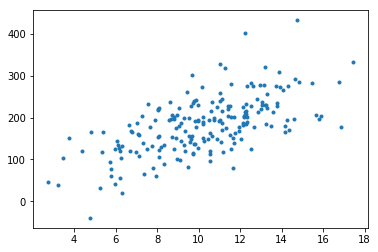

In [68]:
print((xs.T).dot(xs))
A = np.linalg.inv(np.matmul(np.transpose(xs),xs))
B = np.matmul(A, np.transpose(xs))
result = np.matmul(B, ys)

print(result)

output = result.dot(xs.T)
plt.plot(xs['x1'], ys, marker='.',linestyle="None")

NameError: name 'a' is not defined

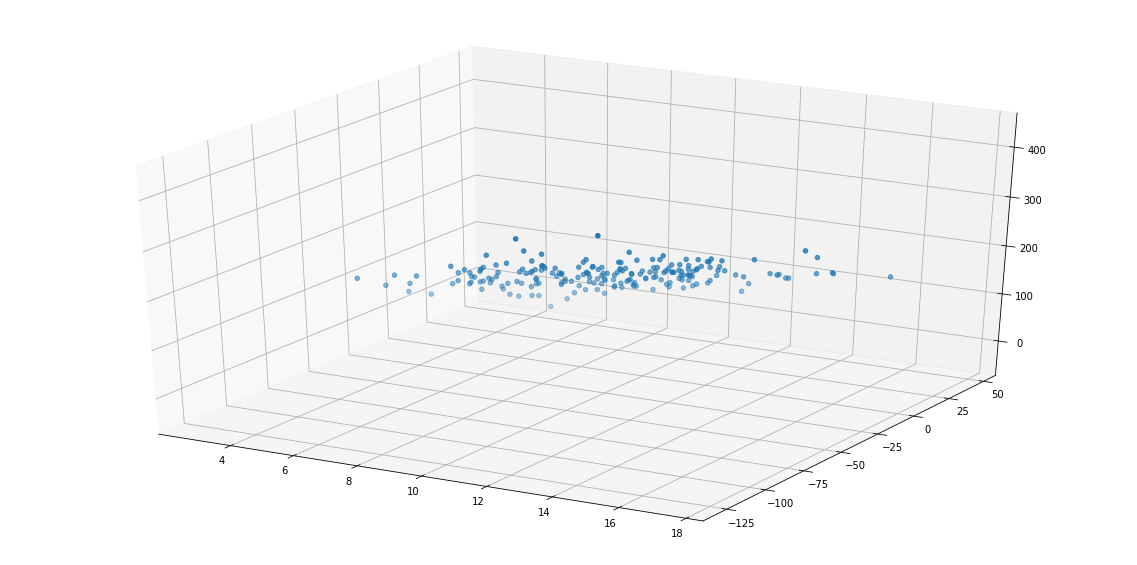

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'], data['x2'], data['y']);

xx, yy = np.meshgrid(data['x1'], data['x2'])
zz = a + b*xx + c*yy

ax.plot_surface(xx, yy, zz, color='red');
ax.view_init(elev=0., azim=30)